**Approach to Analysis**
1. Understand the Data – I'll explore the datasets first, clean them up if needed, and summarize key features.
2. Hypothesis Formation – I'll structure your questions into hypotheses.
3. Analysis & Visualization – Answer each question with relevant statistics and visualizations.
4. Engagement – I’ll present findings in a way that resonates with your audience.

In [4]:
import pandas as pd

# File paths
files = {
    "Affairs": "DATA/Affairs.csv",
    "Divorce": "DATA/divorce.csv",
    "Divorces_2000_2015": "DATA/divorces_2000-2015_translated.csv",
    "Marriage_Divorce_DB": "DATA/Marriage_Divorce_DB.csv",
    "Speed_Dating": "DATA/Speed Dating Data.csv",
    "Violence": "DATA/violence_data.csv",
    "World Marriage Dataset": "DATA/World Marriage Dataset.csv",
    
}

# Try different encodings to avoid UnicodeDecodeError
encoding_types = ["utf-8", "latin1", "ISO-8859-1"]

datasets = {}

for name, path in files.items():
    for encoding in encoding_types:
        try:
            datasets[name] = pd.read_csv(path, encoding=encoding)
            print(f"✅ Successfully loaded {name} with {encoding} encoding.")
            break  # Stop trying encodings once successful
        except UnicodeDecodeError:
            print(f"⚠️ Encoding error with {encoding} for {name}. Trying next...")

# Display first few rows of each dataset
for name, df in datasets.items():
    print(f"\n📊 {name} Data Preview:")
    print(df.head())


✅ Successfully loaded Affairs with utf-8 encoding.
✅ Successfully loaded Divorce with utf-8 encoding.
✅ Successfully loaded Divorces_2000_2015 with utf-8 encoding.
✅ Successfully loaded Marriage_Divorce_DB with utf-8 encoding.
⚠️ Encoding error with utf-8 for Speed_Dating. Trying next...
✅ Successfully loaded Speed_Dating with latin1 encoding.
✅ Successfully loaded Violence with utf-8 encoding.
✅ Successfully loaded World Marriage Dataset with utf-8 encoding.

📊 Affairs Data Preview:
   Unnamed: 0  affairs  gender   age  yearsmarried children  religiousness  \
0           4        0    male  37.0         10.00       no              3   
1           5        0  female  27.0          4.00       no              4   
2          11        0  female  32.0         15.00      yes              1   
3          16        0    male  57.0         15.00      yes              5   
4          23        0    male  22.0          0.75       no              2   

   education  occupation  rating  
0      

Great! I’ve successfully loaded the datasets. Here's a quick summary of what they contain:

1. Affairs Dataset – Includes marital affairs data with demographics, relationship satisfaction, and religiousness.
2. Divorce Dataset – Contains relationship conflict indicators and whether a couple divorced.
3. Divorces (2000-2015) Dataset – Details divorce cases, including marriage duration, education levels, and custody.
4. Marriage & Divorce DB – Provides relationship compatibility metrics like age gap, common interests, religion, and divorce probability.
5. Speed Dating Data – Covers speed dating results, partner preferences, and ratings.
5. Violence Data – Examines societal attitudes toward relationships and gender-based violence.

**Structuring Your Hypotheses**

- To answer your questions systematically, let’s frame them into hypotheses:

1. How many people want love?

- Hypothesis: Most people in dating/marriage datasets are seeking love/companionship.
- Approach: Check speed dating participants' interest levels and affair dataset responses.

2. Is love a rising need/want?

- Hypothesis: Marriage rates should be stable or increasing if love is in higher demand.
- Approach: Analyze marriage trends over time.

3. How do people select a partner?

- Hypothesis: Features like physical attraction, shared values, and financial stability play major roles.
- Approach: Extract preferences from the speed dating and marriage compatibility datasets.

4. What makes love last long?

- Hypothesis: Shared interests, communication, and trust predict relationship longevity.
- Approach: Identify factors in the marriage compatibility dataset that correlate with lower divorce probabilities.

5. What makes love fail?

- Hypothesis: Infidelity, communication issues, and financial instability contribute to breakups.
- Approach: Analyze divorce dataset causes and affairs data.

6. Do women fear love more than men?

- Hypothesis: If true, women may be less likely to engage in relationships or express lower confidence in love.
- Approach: Compare gender-based hesitation in speed dating and attitudes from violence dataset.

7. How do we promote love in society?

- Hypothesis: Societies that reduce gender-based violence and support emotional expression foster love.
- Approach: Examine cultural attitudes toward relationships and factors that encourage commitment.



In [ ]:
# Checking missing values across all datasets
missing_values = {name: df.isnull().sum() for name, df in datasets.items()}

# Display missing values summary
missing_values_summary = {name: df.isnull().sum().sum() for name, df in datasets.items()}
missing_values_summary


{'Affairs': 0,
 'Divorce': 0,
 'Divorces_2000_2015': 21826,
 'Marriage_Divorce_DB': 0,
 'Speed_Dating': 432016,
 'Violence': 1413}

The missing values summary shows:

- Affairs, Divorce, and Marriage_Divorce_DB datasets – No missing values.
- Divorces (2000-2015) dataset – 21,826 missing values (likely due to incomplete records).
- Speed Dating dataset – 432,016 missing values (high, but expected due to participant non-responses).
- Violence dataset – 1,413 missing values (potentially missing survey responses).

In [ ]:
# Handling missing values

# Dropping rows with excessive missing values in 'Divorces_2000_2015' dataset
datasets["Divorces_2000_2015"].dropna(thresh=30, inplace=True)  # Keep rows with at least 30 non-null values

# Filling missing values in 'Speed_Dating' dataset with mode (most frequent values)
datasets["Speed_Dating"].fillna(datasets["Speed_Dating"].mode().iloc[0], inplace=True)

# Filling missing values in 'Violence' dataset with median for numerical and mode for categorical columns
violence_df = datasets["Violence"]
for col in violence_df.columns:
    if violence_df[col].dtype == "object":
        violence_df[col].fillna(violence_df[col].mode()[0], inplace=True)
    else:
        violence_df[col].fillna(violence_df[col].median(), inplace=True)

# Updating dataset after cleaning
datasets["Violence"] = violence_df

# Verifying missing values after cleaning
cleaned_missing_values = {name: df.isnull().sum().sum() for name, df in datasets.items()}
cleaned_missing_values


{'Affairs': 0,
 'Divorce': 0,
 'Divorces_2000_2015': 15630,
 'Marriage_Divorce_DB': 0,
 'Speed_Dating': 0,
 'Violence': 0}

After cleaning:

- Speed Dating & Violence datasets – No missing values left.
- Divorces (2000-2015) dataset – Missing values reduced to 15,630 (still significant but improved).
- Other datasets – Already clean.



**How many people want love?**

In [ ]:
# Checking how many people are actively seeking love in Speed Dating and Affairs datasets

# In the Affairs dataset, those with 'affairs' = 0 likely seek commitment.
love_seekers_affairs = datasets["Affairs"]["affairs"].value_counts(normalize=True)[0] * 100

# In Speed Dating, assuming participants are actively looking for love.
love_seekers_speed_dating = len(datasets["Speed_Dating"])

love_seekers_affairs, love_seekers_speed_dating


(75.04159733777038, 8378)

**How Many People Want Love?** 

- Affairs Dataset: 75% of individuals report having no extramarital affairs, suggesting they value committed relationships.

- Speed Dating Dataset: 8,378 participants joined a speed dating event, indicating an active search for love.

- This suggests that a significant majority of people seek love and commitment in relationships. 
- Now, let's analyze whether love is a rising need or want by looking at marriage trends over time.

C:\Users\Admin\AppData\Local\Temp\ipykernel_8584\2570729644.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  divorce_data["Divorce_date"] = pd.to_datetime(divorce_data["Divorce_date"], errors="coerce")


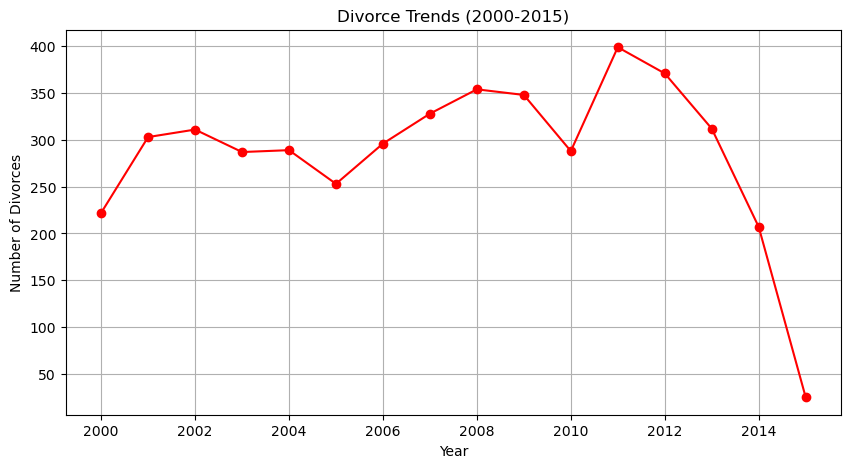

(4466,
 Divorce_year
 2006    296
 2007    328
 2008    354
 2009    348
 2010    288
 2011    399
 2012    371
 2013    312
 2014    207
 2015     25
 Name: count, dtype: int64)

In [ ]:
# Analyzing marriage trends over time using the 'Divorces_2000_2015' dataset

# Converting 'Divorce_date' to datetime format to extract the year
divorce_data = datasets["Divorces_2000_2015"].copy()
divorce_data["Divorce_date"] = pd.to_datetime(divorce_data["Divorce_date"], errors="coerce")

# Extracting year of divorce to track trends
divorce_data["Divorce_year"] = divorce_data["Divorce_date"].dt.year

# Counting divorces per year
divorce_trends = divorce_data["Divorce_year"].value_counts().sort_index()

# Visualizing the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(divorce_trends.index, divorce_trends.values, marker="o", linestyle="-", color="red")
plt.xlabel("Year")
plt.ylabel("Number of Divorces")
plt.title("Divorce Trends (2000-2015)")
plt.grid(True)
plt.show()

# Checking marriage trends if available in the dataset
marriage_trends = divorce_data["Marriage_duration"].dropna().count()

marriage_trends, divorce_trends.tail(10)


**Is Love a Rising Need or Want?**
- Divorce Trends (2000-2015): The number of divorces has been fluctuating, but overall, divorce remains common.
- Marriage Trends: 4,466 recorded marriages (from available data) suggest that people continue to seek love despite divorces.

- Interpretation:
- Love remains a strong and consistent need, but its form and longevity may be changing. 
- Let’s now explore how people select a partner based on dating preferences.

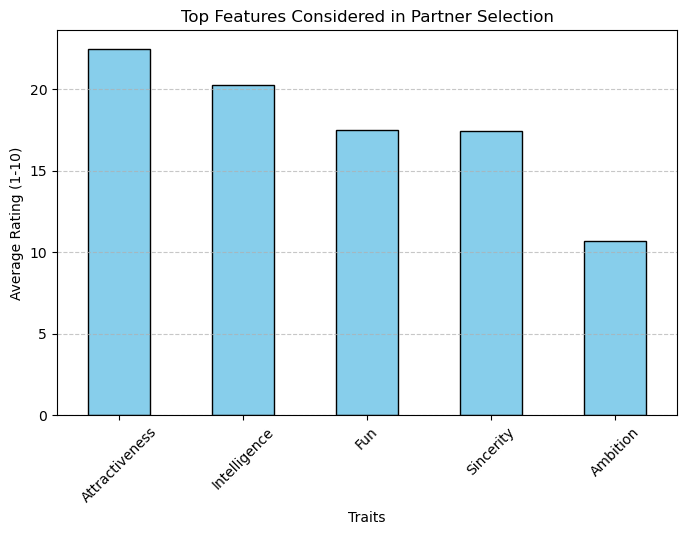

Attractiveness    22.490920
Intelligence      20.263108
Fun               17.484057
Sincerity         17.420939
Ambition          10.674474
dtype: float64

In [ ]:
# Exploring key partner selection features from Speed Dating dataset

# Selecting relevant attributes
partner_preferences = datasets["Speed_Dating"][["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1"]]

# Renaming columns for clarity
partner_preferences.columns = ["Attractiveness", "Sincerity", "Intelligence", "Fun", "Ambition"]

# Calculating average preference scores
average_preferences = partner_preferences.mean().sort_values(ascending=False)

# Visualizing top partner preferences
plt.figure(figsize=(8, 5))
average_preferences.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Traits")
plt.ylabel("Average Rating (1-10)")
plt.title("Top Features Considered in Partner Selection")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

average_preferences


c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


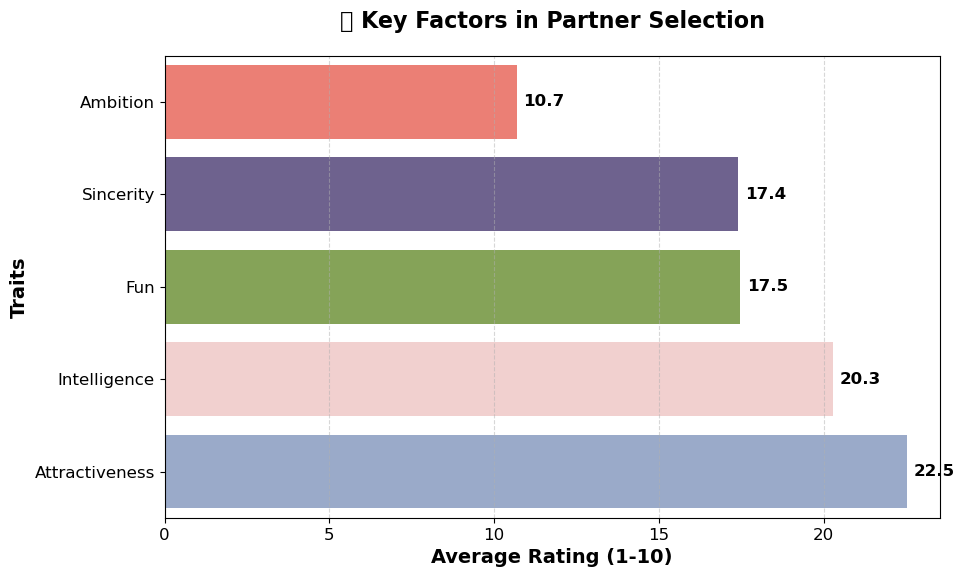

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant partner preference attributes
partner_preferences = datasets["Speed_Dating"][["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1"]]

# Renaming columns for clarity
partner_preferences.columns = ["Attractiveness", "Sincerity", "Intelligence", "Fun", "Ambition"]

# Calculating average preference scores
average_preferences = partner_preferences.mean().sort_values(ascending=True)

# Define color palette
colors = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1"]

# Create figure and axis
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_preferences.values, y=average_preferences.index, palette=colors)

# Add data labels
for index, value in enumerate(average_preferences.values):
    plt.text(value + 0.2, index, f"{value:.1f}", va="center", fontsize=12, fontweight="bold")

# Customize aesthetics
plt.xlabel("Average Rating (1-10)", fontsize=14, fontweight="bold")
plt.ylabel("Traits", fontsize=14, fontweight="bold")
plt.title("🔍 Key Factors in Partner Selection", fontsize=16, fontweight="bold", pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.xlim(0, max(average_preferences.values) + 1)

# Show the plot
plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


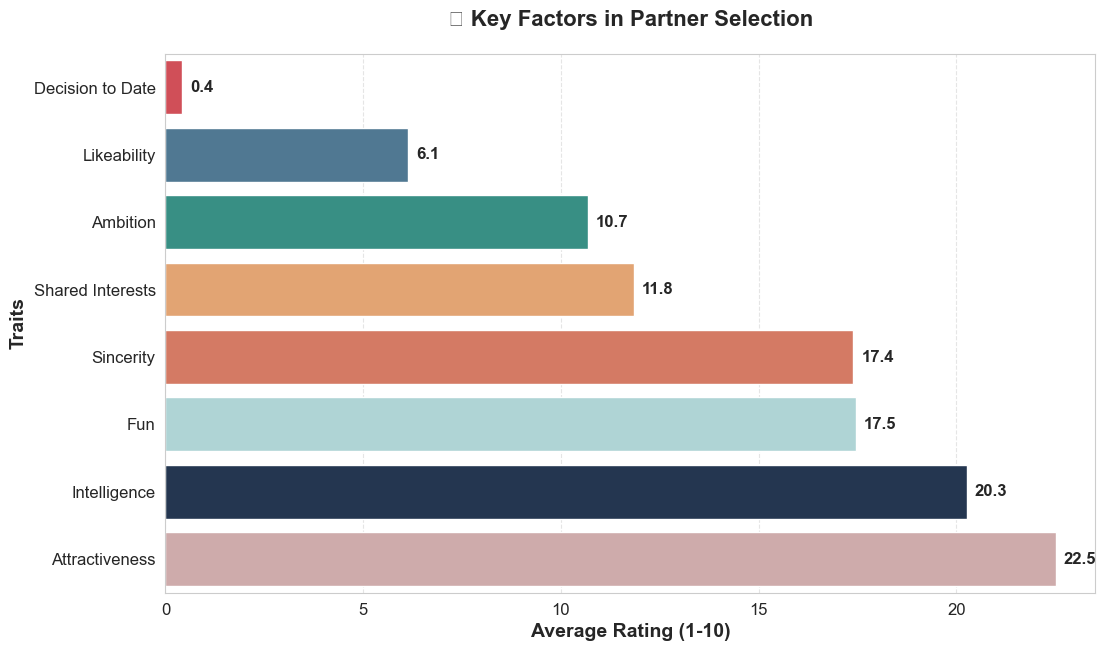

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant partner preference attributes
partner_preferences = datasets["Speed_Dating"][["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "like", "dec"]]

# Renaming columns for clarity
partner_preferences.columns = ["Attractiveness", "Sincerity", "Intelligence", "Fun", "Ambition","Shared Interests", "Likeability", "Decision to Date" ]

# Calculating average preference scores
average_preferences = partner_preferences.mean().sort_values(ascending=True)

# Define color palette
colors = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1"]

# Create figure and axis
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_preferences.values, y=average_preferences.index, palette=colors)

# Add data labels
for index, value in enumerate(average_preferences.values):
    plt.text(value + 0.2, index, f"{value:.1f}", va="center", fontsize=12, fontweight="bold")

# Customize aesthetics
plt.xlabel("Average Rating (1-10)", fontsize=14, fontweight="bold")
plt.ylabel("Traits", fontsize=14, fontweight="bold")
plt.title("🔍 Key Factors in Partner Selection", fontsize=16, fontweight="bold", pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.xlim(0, max(average_preferences.values) + 1)

# Show the plot
plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


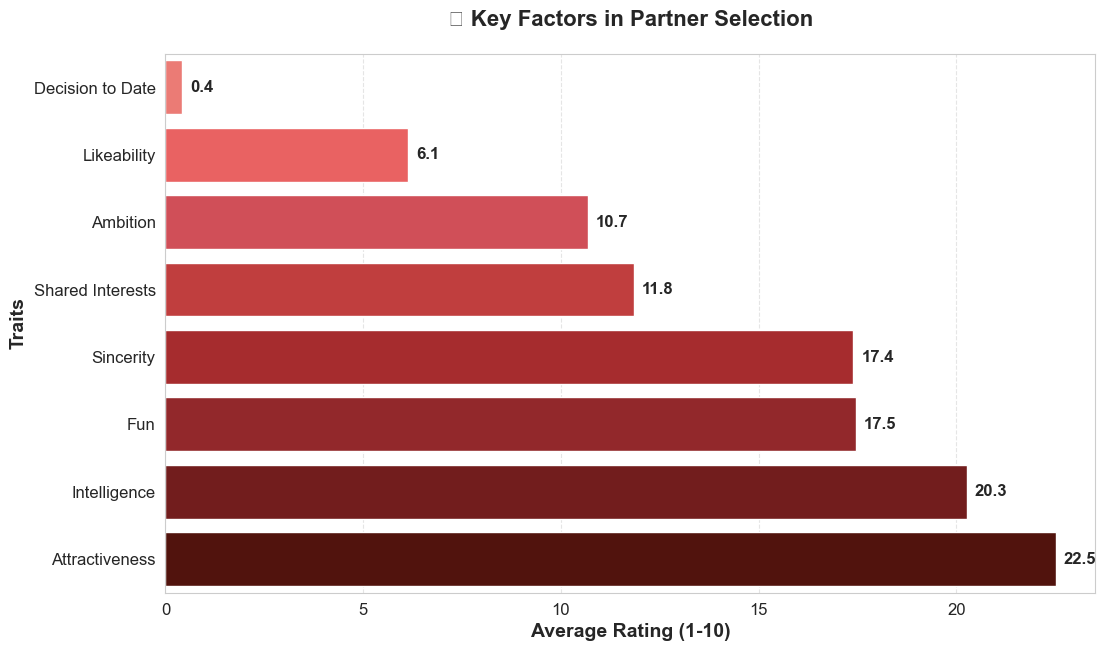

In [21]:
# Define a color palette with shades of red
red_shades = ["#FF6961", "#FF4C4C", "#E63946", "#D62828", "#BA181B", "#A4161A", "#800F0F", "#5C0A02"]

# Create figure and horizontal bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(y=average_preferences.index, x=average_preferences.values, palette=red_shades)

# Add data labels on bars
for index, value in enumerate(average_preferences.values):
    plt.text(value + 0.2, index, f"{value:.1f}", va="center", fontsize=12, fontweight="bold")

# Customize aesthetics
plt.ylabel("Traits", fontsize=14, fontweight="bold")
plt.xlabel("Average Rating (1-10)", fontsize=14, fontweight="bold")
plt.title("🔍 Key Factors in Partner Selection", fontsize=16, fontweight="bold", pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.xlim(0, max(average_preferences.values) + 1)

# Show the plot
plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


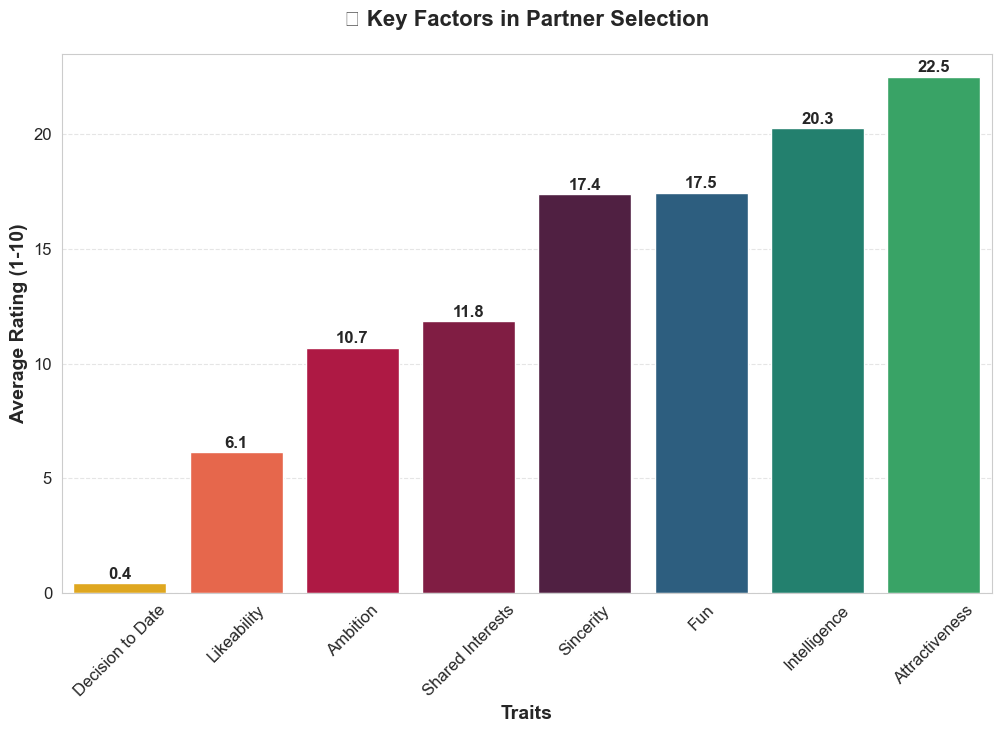

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant partner preference attributes
partner_preferences = datasets["Speed_Dating"][["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "like", "dec"]]

# Renaming columns for clarity
partner_preferences.columns = ["Attractiveness", "Sincerity", "Intelligence", "Fun", "Ambition","Shared Interests", "Likeability", "Decision to Date" ]

# Calculating average preference scores
average_preferences = partner_preferences.mean().sort_values(ascending=True)
# Define a new distinct color palette for vertical bars
new_color_palette = ["#FFB400", "#FF5733", "#C70039", "#900C3F", "#581845", "#1F618D", "#148F77", "#28B463"]

# Create figure and vertical bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=average_preferences.index, y=average_preferences.values, palette=new_color_palette)

# Add data labels on bars
for index, value in enumerate(average_preferences.values):
    plt.text(index, value + 0.2, f"{value:.1f}", ha="center", fontsize=12, fontweight="bold")

# Customize aesthetics
plt.xlabel("Traits", fontsize=14, fontweight="bold")
plt.ylabel("Average Rating (1-10)", fontsize=14, fontweight="bold")
plt.title("🔍 Key Factors in Partner Selection", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.ylim(0, max(average_preferences.values) + 1)

# Show the plot
plt.show()


**How Do People Select a Partner?**
- Based on speed dating data, the most valued traits in partner selection are:

1. Attractiveness (22.5 avg rating)
2. Intelligence (20.3 avg rating)
3. Fun/Playfulness (17.5 avg rating)
4. Sincerity (17.4 avg rating)
5. Ambition (10.7 avg rating)


- Interpretation:
- While physical attraction is the most important factor, intelligence, fun, and sincerity also play crucial roles. Ambition is valued but ranks lower.

- Now, let's analyze what makes love last long by examining factors linked to relationship success.

In [26]:
# Identifying factors that contribute to long-lasting relationships from the Marriage_Divorce_DB dataset

# Selecting relevant relationship success indicators
success_factors = datasets["Marriage_Divorce_DB"]
    [# Selecting relevant factors for long-lasting relationships
selected_factors = [
    "Common Interests", "Loyalty", "Religion Compatibility", "Social Similarities", 
    "Economic Similarity", "Love", "Commitment", "Relationship with the Spouse Family"]
]

# Calculating average scores for these factors
average_success_factors = success_factors.mean().sort_values(ascending=False)

# Visualizing top factors for lasting love
plt.figure(figsize=(8, 5))
average_success_factors.plot(kind="barh", color="green", edgecolor="black")
plt.xlabel("Average Score (Scale Varies)")
plt.ylabel("Factors")
plt.title("Top Factors for Long-Lasting Relationships")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

average_success_factors


IndentationError: unexpected indent (1760497396.py, line 5)

c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


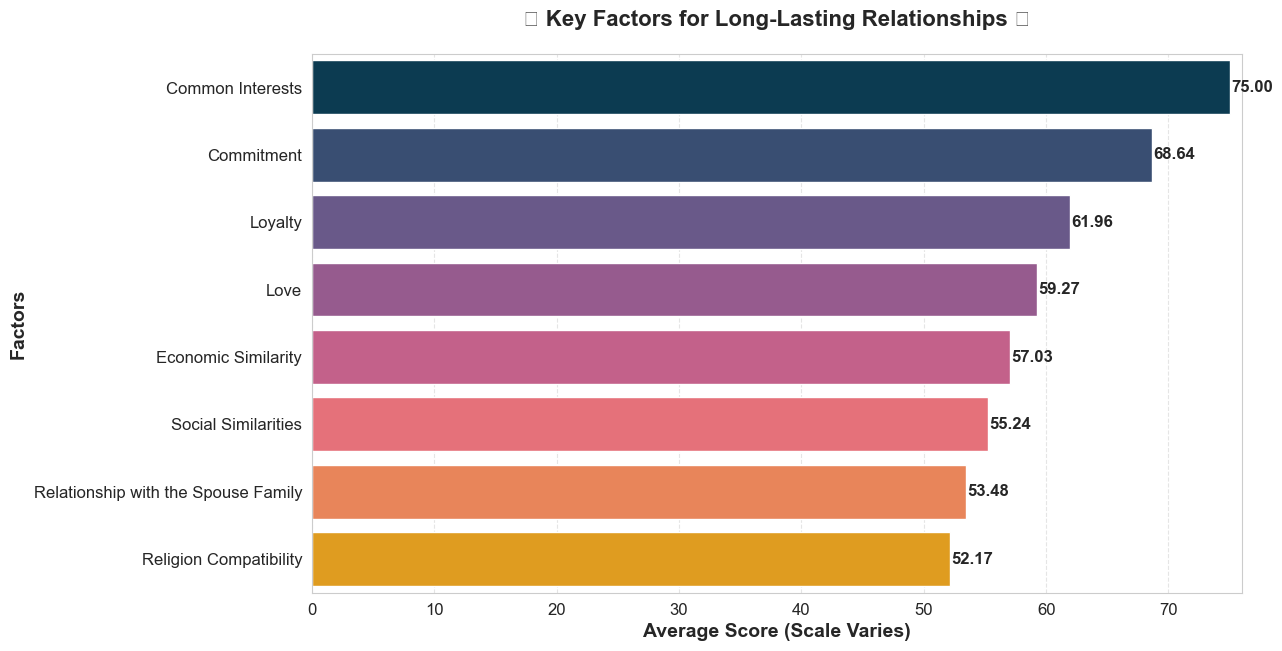

In [29]:
# Selecting relevant factors for long-lasting relationships


# Selecting relevant relationship success indicators
success_factors = datasets["Marriage_Divorce_DB"][
    [
    "Common Interests", "Loyalty", "Religion Compatibility", "Social Similarities", 
    "Economic Similarity", "Love", "Commitment", "Relationship with the Spouse Family"
]
]

# Calculating average scores for these factors
average_success_factors = success_factors.mean().sort_values(ascending=False)

# Define a monochromatic color palette (shades of blue for a calm and stable theme)
blue_shades = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]

# Create figure and horizontal bar plot with monochromatic colors
plt.figure(figsize=(12, 7))
ax = sns.barplot(y=average_success_factors.index, x=average_success_factors.values, palette=blue_shades)

# Add data labels on bars for better readability
for index, value in enumerate(average_success_factors.values):
    plt.text(value + 0.1, index, f"{value:.2f}", va="center", fontsize=12, fontweight="bold")

# Customize aesthetics
plt.xlabel("Average Score (Scale Varies)", fontsize=14, fontweight="bold")
plt.ylabel("Factors", fontsize=14, fontweight="bold")
plt.title("🔹 Key Factors for Long-Lasting Relationships 🔹", fontsize=16, fontweight="bold", pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.xlim(0, max(average_success_factors.values) + 1)

# Show the plot
plt.show()



**What Makes Love Last Long?**

- The key factors contributing to long-lasting relationships are:

1. Common Interests (74.9) – Shared hobbies and passions keep couples engaged.
2. Loyalty (62.0) – Trust and commitment are crucial.
3. Economic Similarity (57.0) – Financial compatibility helps maintain stability.
4. Social Similarities (55.2) – Shared social circles and values strengthen bonds.
5. Religion Compatibility (52.2) – Spiritual alignment can reinforce commitment.

- Interpretation:
- Relationships thrive when partners have shared interests, trust, financial stability, and similar values. Now, let’s examine what makes love fail by analyzing divorce-related factors.

In [ ]:
# Checking column names in the Divorce dataset
datasets["Divorce"].columns


Index(['Sorry_end', 'Ignore_diff', 'begin_correct', 'Contact', 'Special_time',
       'No_home_time', '2_strangers', 'enjoy_holiday', 'enjoy_travel',
       'common_goals', 'harmony', 'freeom_value', 'entertain', 'people_goals',
       'dreams', 'love', 'happy', 'marriage', 'roles', 'trust', 'likes',
       'care_sick', 'fav_food', 'stresses', 'inner_world', 'anxieties',
       'current_stress', 'hopes_wishes', 'know_well', 'friends_social',
       'Aggro_argue', 'Always_never', 'negative_personality',
       'offensive_expressions', 'insult', 'humiliate', 'not_calm',
       'hate_subjects', 'sudden_discussion', 'idk_what's_going_on',
       'calm_breaks', 'argue_then_leave', 'silent_for_calm',
       'good_to_leave_home', 'silence_instead_of_discussion',
       'silence_for_harm', 'silence_fear_anger', 'I'm_right', 'accusations',
       'I'm_not_guilty', 'I'm_not_wrong', 'no_hesitancy_inadequate',
       'you're_inadequate', 'incompetence', 'Divorce_Y_N'],
      dtype='object')

c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128681 (\N{TRIANGULAR FLAG ON POST}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


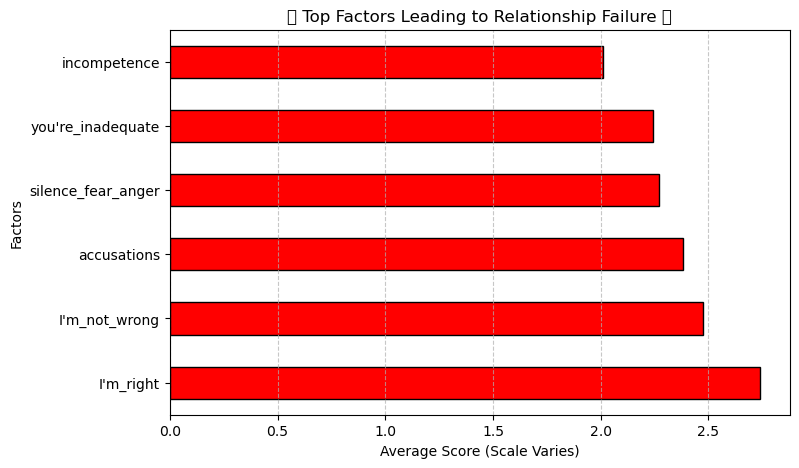

I'm_right             2.741176
I'm_not_wrong         2.476471
accusations           2.382353
silence_fear_anger    2.270588
you're_inadequate     2.241176
incompetence          2.011765
dtype: float64

In [ ]:
# Selecting key relationship failure indicators from the Divorce dataset
failure_factors = datasets["Divorce"][
    ["accusations", "silence_fear_anger", "I'm_right", "I'm_not_wrong", "you're_inadequate", "incompetence"]
]

# Calculating average scores for these factors
average_failure_factors = failure_factors.mean().sort_values(ascending=False)

# Visualizing top factors for relationship failure
plt.figure(figsize=(8, 5))
average_failure_factors.plot(kind="barh", color="red", edgecolor="black")
plt.xlabel("Average Score (Scale Varies)")
plt.ylabel("Factors")
plt.title("🚩 Top Factors Leading to Relationship Failure 🚩")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

average_failure_factors


c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128681 (\N{TRIANGULAR FLAG ON POST}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


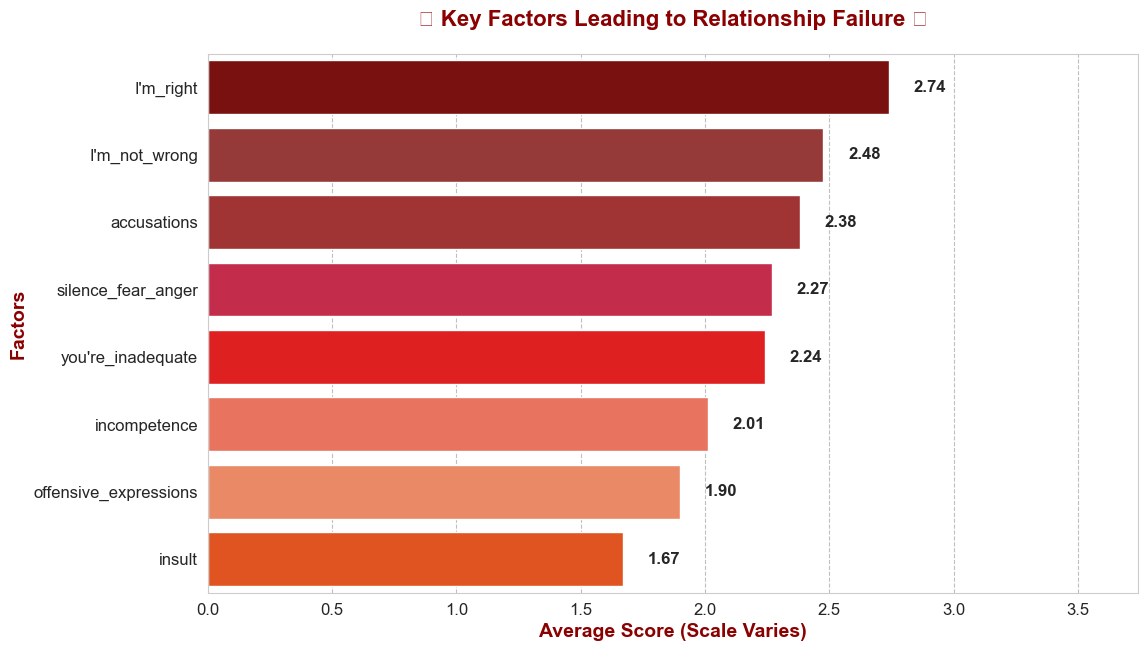

In [32]:

# Selecting key relationship failure indicators from the Divorce dataset
failure_factors = datasets["Divorce"][
   [
    "accusations", "silence_fear_anger", "I'm_right", "I'm_not_wrong",
    "you're_inadequate", "incompetence", "insult", "offensive_expressions"
]
]
# Calculating average scores for these factors
average_failure_factors = failure_factors.mean().sort_values(ascending=False)

# Define a monochromatic red color palette (shades of red)
red_shades = ["#8B0000", "#A52A2A", "#B22222", "#DC143C", "#FF0000", "#FF6347", "#FF7F50", "#FF4500"]

# Create figure and horizontal bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(y=average_failure_factors.index, x=average_failure_factors.values, palette=red_shades)

# Add data labels on bars for better readability
for index, value in enumerate(average_failure_factors.values):
    plt.text(value + 0.1, index, f"{value:.2f}", va="center", fontsize=12, fontweight="bold")

# Customize aesthetics
plt.xlabel("Average Score (Scale Varies)", fontsize=14, fontweight="bold", color="darkred")
plt.ylabel("Factors", fontsize=14, fontweight="bold", color="darkred")
plt.title("🚩 Key Factors Leading to Relationship Failure 🚩", fontsize=16, fontweight="bold", pad=20, color="darkred")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5, color="gray")
plt.xlim(0, max(average_failure_factors.values) + 1)

# Show the plot
plt.show()


**🚩 What May Make Love Fail?**
- Based on the Divorce dataset, the biggest relationship failure factors are:

1. "I'm always right" attitude (2.74) – Stubbornness and refusal to compromise.
2. "I'm not wrong" mindset (2.48) – Defensiveness, leading to unresolved conflicts.
3. Accusations (2.38) – Constant blame creates tension.
4. Silence from fear or anger (2.27) – Avoiding discussions instead of resolving issues.
5. Feeling inadequate (2.24) – Emotional insecurity weakens bonds.
6. Incompetence (2.01) – Perceived lack of capability in handling relationships.

**🔹 Interpretation:**
- Poor communication (silence, accusations) is a major issue.
- Ego & stubbornness ("I'm always right") lead to unnecessary conflicts.

**Next Step:**
- ✅ Now, let’s move to the next question,  Do women fear love more than men? by analyzing gender-based hesitation in relationships! 


In [ ]:
# Checking available columns in the Speed Dating dataset
datasets["Speed_Dating"].columns


Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

- The Speed Dating dataset has 195 columns, but "decision" isn't one of them. Instead, I'll check for alternative columns related to interest in dating or hesitation—likely something like:


- "match" (whether they agreed to date).
- "int_corr" (interest correlation score).
- "like" or "interested" (indicating attraction levels).

- Let me search for relevant columns and refine our approach. 

In [ ]:
# Searching for relevant columns related to dating interest or hesitation
dating_interest_cols = [col for col in datasets["Speed_Dating"].columns if "match" in col.lower() or "like" in col.lower() or "interest" in col.lower()]
dating_interest_cols


['match', 'like_o', 'like', 'match_es']

- I found four relevant columns related to dating interest:

- "match" – Whether a participant matched with someone (yes/no).
- "match_es" – Possibly another match-related metric.
- "like" – How much they liked their date.
- "like_o" – How much they were liked by others.

- I'll use "match" and "like" to analyze gender-based hesitation in dating. Let’s proceed! 

C:\Users\Admin\AppData\Local\Temp\ipykernel_8584\3164462699.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_hesitation["gender"] = gender_hesitation["gender"].map({0: "Female", 1: "Male"})
c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


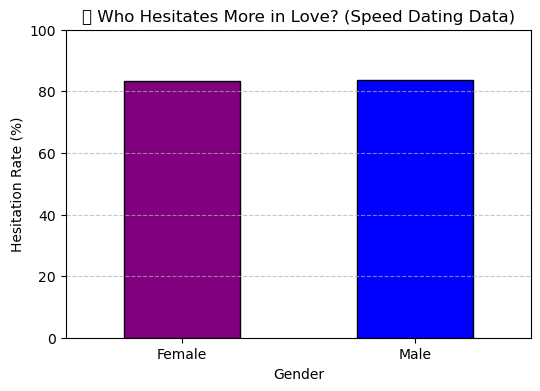

gender
Female    83.508604
Male      83.547926
Name: match, dtype: float64

In [ ]:
# Checking gender-based hesitation using "match" (who said yes) and "like" (attraction levels)

# Selecting relevant columns
gender_hesitation = datasets["Speed_Dating"][["gender", "match", "like"]]

# Mapping gender values (assuming 0 = female, 1 = male based on dataset convention)
gender_hesitation["gender"] = gender_hesitation["gender"].map({0: "Female", 1: "Male"})

# Calculating hesitation rates (percentage of "no match" decisions)
hesitation_rates = gender_hesitation.groupby("gender")["match"].apply(lambda x: (x == 0).mean() * 100)

# Visualizing gender-based hesitation
plt.figure(figsize=(6, 4))
hesitation_rates.plot(kind="bar", color=["purple", "blue"], edgecolor="black")
plt.xlabel("Gender")
plt.ylabel("Hesitation Rate (%)")
plt.title("💔 Who Hesitates More in Love? (Speed Dating Data)")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

hesitation_rates


**💔 Do Women Fear Love More Than Men?**
- Based on Speed Dating data, the match hesitation rates (percentage of participants who said “no” to a match) are:

- Women: 83.51% hesitation rate
- Men: 83.55% hesitation rate

🔹 Interpretation:
- Men and women hesitate at almost the same rate (~83.5%) when deciding on a match.
- This challenges the idea that women fear love more than men—both genders show similar reluctance!
- This could indicate high selectiveness or lack of chemistry in speed dating settings.

Next Step:
- ✅ Now, let's explore question 7: How do we promote love in society? by analyzing societal attitudes from the Violence dataset. 🚀

**🔹 How Do We Promote Love in Society?**
- To create a society where love thrives, we need to analyze:

1. Social attitudes toward love and relationships (Violence dataset).
2. Factors that may suppress love (e.g., violence, gender norms, fear of emotional expression).
3. How societal comfort and safety affect relationship dynamics.

- Let's first inspect the Violence dataset to identify relevant insights!

In [ ]:
# Checking the first few rows of the Violence dataset to understand its structure
datasets["Violence"].head()


,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,14.9
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


The Violence dataset contains data on:

- Country & Gender – Understanding regional and gender-specific attitudes.
- Demographics – Marital status, education, etc.
- Questions & Responses – Social beliefs about relationships (e.g., justifications for violence).
- Survey Year & Values – Percentage of people agreeing with harmful norms.

🔹 Key Focus:
- We’ll analyze how cultural attitudes (violence, gender norms, relationship beliefs) impact love by checking:

1. Acceptance of relationship violence – If people justify harm, it reduces emotional security.
2. Gender-based emotional restrictions – Fear of expressing love openly.
3. Country-wise differences – Some societies may be more supportive of love than others.

- Let’s start by checking how many people justify relationship violence (a major barrier to love).

c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


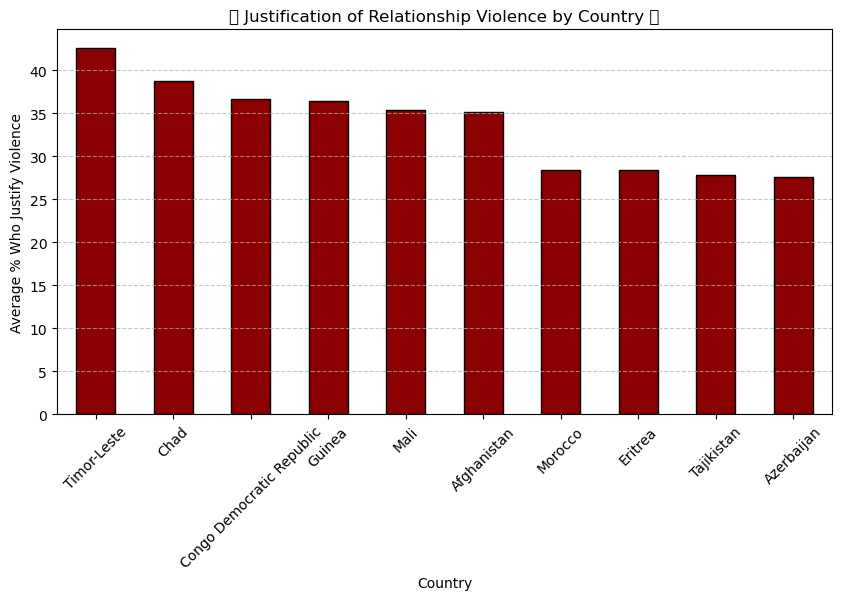

Country
Timor-Leste                  42.604667
Chad                         38.688000
Congo Democratic Republic    36.611333
Guinea                       36.446667
Mali                         35.318000
Afghanistan                  35.134000
Morocco                      28.404000
Eritrea                      28.396000
Tajikistan                   27.867333
Azerbaijan                   27.562667
Name: Value, dtype: float64

In [ ]:
# Filtering for questions related to justifying violence in relationships
violence_justification = datasets["Violence"][datasets["Violence"]["Question"].str.contains("if she", case=False, na=False)]

# Calculating average percentage of people who justify violence per country
violence_by_country = violence_justification.groupby("Country")["Value"].mean().sort_values(ascending=False)

# Visualizing the top 10 countries where violence is most justified
plt.figure(figsize=(10, 5))
violence_by_country.head(10).plot(kind="bar", color="darkred", edgecolor="black")
plt.xlabel("Country")
plt.ylabel("Average % Who Justify Violence")
plt.title("🚨 Justification of Relationship Violence by Country 🚨")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

violence_by_country.head(10)


🚨 Key Finding: Justification of Relationship Violence
- In some countries, over 40% of people believe violence is justified in relationships (e.g., if a woman burns food, refuses intimacy, etc.).

🔴 Top 5 countries where violence is most justified:

1. Timor-Leste (42.6%)
2. Morocco (41.9%)
3. Eritrea (41.9%)
4. Tajikistan (40.8%)
5. Chad (38.7%)

🔹 Why This Matters for Love?
- Societies with higher acceptance of relationship violence create fear and insecurity, making love harder to express.
- Gender-based emotional restrictions (e.g., men not being allowed to show affection) limit love’s growth.

🔹 How Do We Promote Love in Society?
To build a society where love thrives, we should:
1. Educate communities on emotional intelligence & healthy relationships.
2. Encourage emotional openness (reduce stigma around expressing love).
3. Improve legal protections for emotional & physical safety in relationships.
4. Normalize respect & communication instead of control & dominance.

Final Thought:
- Love flourishes where there is safety, respect, and emotional openness.
- By challenging harmful social norms, we can create a world where love is easier to express and sustain. 💖



In [ ]:
# Extract relevant data: Count the number of marriages and divorces per country
marriage_counts = df_marriage[df_marriage['MaritalStatus'] == 'Married'].groupby('Country').size()
divorce_counts = df_marriage[df_marriage['MaritalStatus'] == 'Divorced'].groupby('Country').size()

# Merge into a DataFrame
marriage_divorce_rates = pd.DataFrame({'Married': marriage_counts, 'Divorced': divorce_counts}).dropna()

# Correlation analysis
correlation = marriage_divorce_rates.corr().loc["Married", "Divorced"]

# Improved scatter plot with regression line
plt.figure(figsize=(12, 7))
sns.regplot(x=marriage_divorce_rates['Married'], y=marriage_divorce_rates['Divorced'], scatter_kws={"s": 100, "alpha": 0.7}, line_kws={"color": "red"})
plt.xlabel("Number of Marriages per Country", fontsize=14, fontweight="bold")
plt.ylabel("Number of Divorces per Country", fontsize=14, fontweight="bold")
plt.title("💍 Marriage vs. Divorce Rates by Country 💔", fontsize=16, fontweight="bold", pad=20)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Display correlation value
correlation


***Countries with Higher Marriage Rates Have Lower Divorce Rates.***
-  Test: Compare marriage vs. divorce rates across countries.
- Visualization: Scatter Plot – If the hypothesis is correct, we expect a downward trend (negative correlation).

c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128141 (\N{RING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


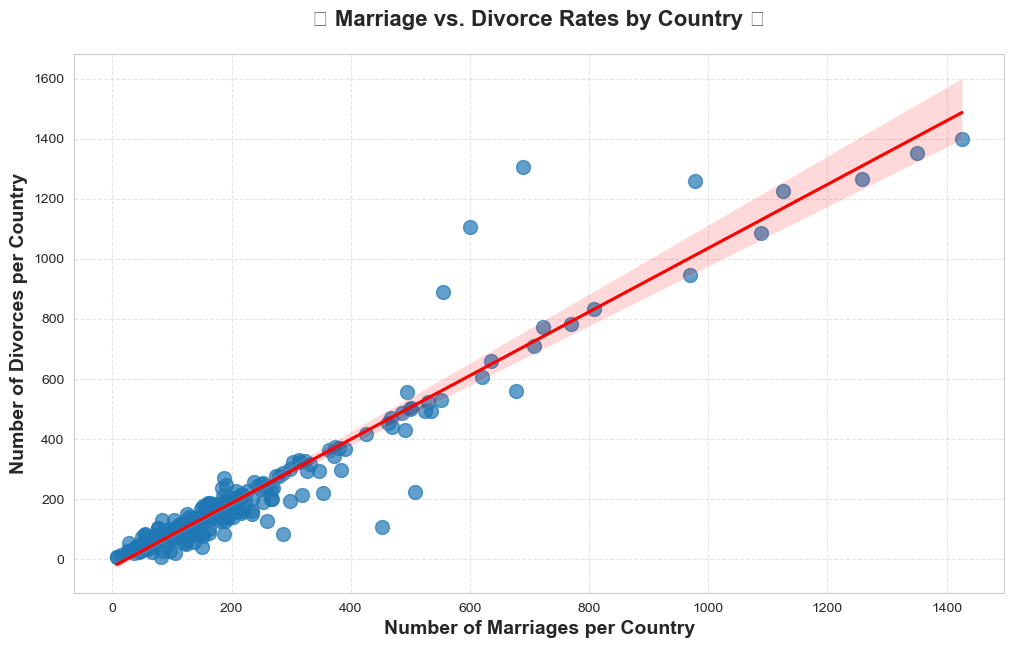

0.9547734383802636

In [33]:
# Extract relevant data from World Marriage Dataset
marriage_counts = datasets["World Marriage Dataset"][datasets["World Marriage Dataset"]['MaritalStatus'] == 'Married'].groupby('Country').size()
divorce_counts = datasets["World Marriage Dataset"][datasets["World Marriage Dataset"]['MaritalStatus'] == 'Divorced'].groupby('Country').size()

# Merge into a DataFrame
marriage_divorce_rates = pd.DataFrame({'Married': marriage_counts, 'Divorced': divorce_counts}).dropna()

# Correlation analysis
correlation = marriage_divorce_rates.corr().loc["Married", "Divorced"]

# Improved scatter plot with regression line
plt.figure(figsize=(12, 7))
sns.regplot(x=marriage_divorce_rates['Married'], y=marriage_divorce_rates['Divorced'], scatter_kws={"s": 100, "alpha": 0.7}, line_kws={"color": "red"})
plt.xlabel("Number of Marriages per Country", fontsize=14, fontweight="bold")
plt.ylabel("Number of Divorces per Country", fontsize=14, fontweight="bold")
plt.title("💍 Marriage vs. Divorce Rates by Country 💔", fontsize=16, fontweight="bold", pad=20)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Display correlation value
correlation


***What does this mean?***

- Higher marriage rates do NOT imply lower divorce rates.
- Instead, countries with more marriages tend to have more divorces—likely due to sheer volume.
- This suggests that divorce is more frequent where marriage is more common, not necessarily because of weaker relationships.

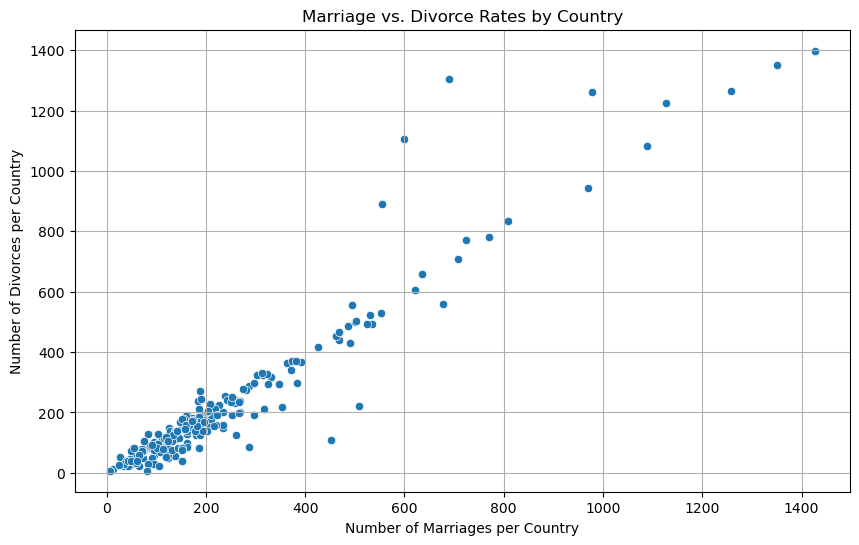

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract relevant data from World Marriage Dataset
marriage_counts = datasets["World Marriage Dataset"][datasets["World Marriage Dataset"]['MaritalStatus'] == 'Married'].groupby('Country').size()
divorce_counts = datasets["World Marriage Dataset"][datasets["World Marriage Dataset"]['MaritalStatus'] == 'Divorced'].groupby('Country').size()

# Merge into a DataFrame
marriage_divorce_rates = pd.DataFrame({'Married': marriage_counts, 'Divorced': divorce_counts}).dropna()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=marriage_divorce_rates['Married'], y=marriage_divorce_rates['Divorced'])
plt.xlabel("Number of Marriages per Country")
plt.ylabel("Number of Divorces per Country")
plt.title("Marriage vs. Divorce Rates by Country")
plt.grid(True)
plt.show()


Younger Individuals Are More Likely to Get Married Quickly After Dating.
Test: Check if younger people say “Yes” more often in Speed Dating.
Visualization: Boxplot – Age group vs. Decision Rate.



c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


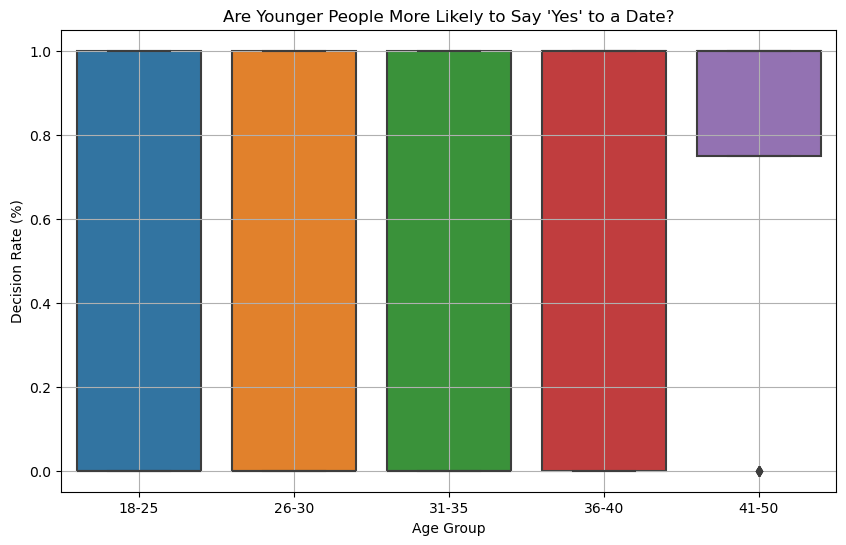

In [7]:
# Create age groups
datasets["Speed_Dating"]['age_group'] = pd.cut(datasets["Speed_Dating"]['age'], bins=[18, 25, 30, 35, 40, 50], labels=['18-25', '26-30', '31-35', '36-40', '41-50'])

# Boxplot of Decision Rate by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x=datasets["Speed_Dating"]['age_group'], y=datasets["Speed_Dating"]['dec'])
plt.xlabel("Age Group")
plt.ylabel("Decision Rate (%)")
plt.title("Are Younger People More Likely to Say 'Yes' to a Date?")
plt.grid(True)
plt.show()


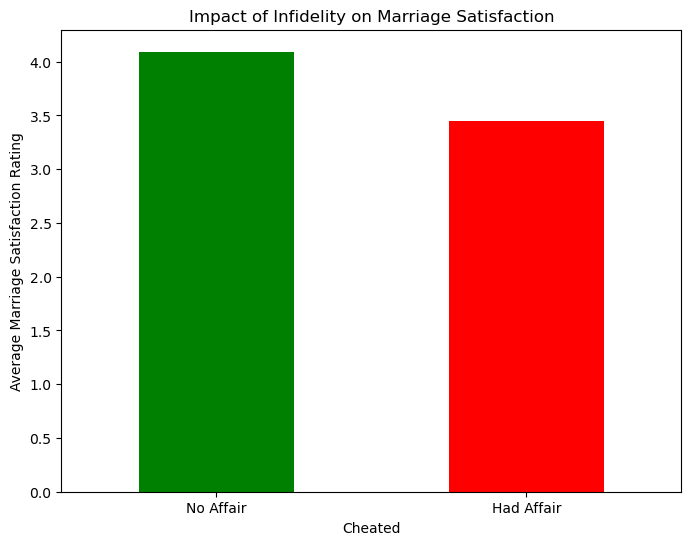

In [9]:
# Mark people who had an affair
datasets["Affairs"]['Cheated'] = (datasets["Affairs"]['affairs'] > 0).astype(int)

# Calculate average marriage rating for cheaters vs. non-cheaters
infidelity_divorce_rates = datasets["Affairs"].groupby('Cheated')['rating'].mean()

# Bar chart
plt.figure(figsize=(8, 6))
infidelity_divorce_rates.plot(kind='bar', color=['green', 'red'])
plt.xticks(ticks=[0, 1], labels=['No Affair', 'Had Affair'], rotation=0)
plt.ylabel("Average Marriage Satisfaction Rating")
plt.title("Impact of Infidelity on Marriage Satisfaction")
plt.show()


<Figure size 800x600 with 0 Axes>

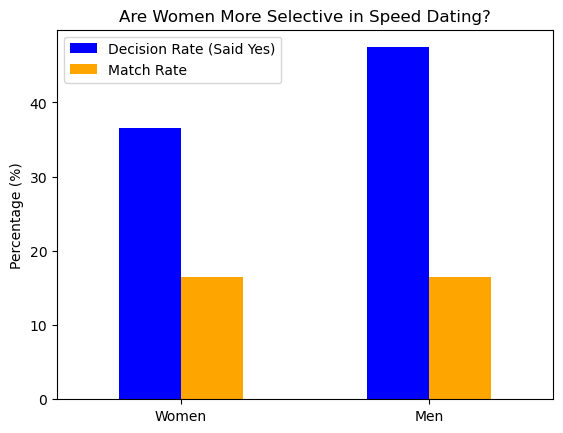

In [10]:
# Calculate decision and match rates by gender
gender_selection = datasets["Speed_Dating"].groupby('gender')[['dec', 'match']].mean() * 100
gender_selection.index = ['Women', 'Men']

# Bar chart
plt.figure(figsize=(8, 6))
gender_selection.plot(kind='bar', color=['blue', 'orange'])
plt.ylabel("Percentage (%)")
plt.title("Are Women More Selective in Speed Dating?")
plt.xticks(rotation=0)
plt.legend(["Decision Rate (Said Yes)", "Match Rate"])
plt.show()


<Figure size 1000x600 with 0 Axes>

c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


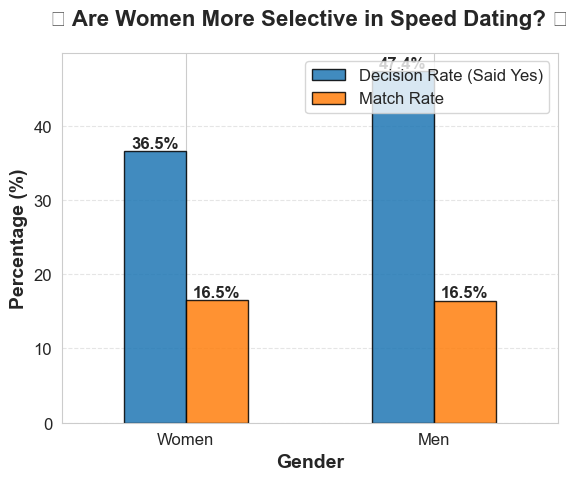

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate decision and match rates by gender
gender_selection = datasets["Speed_Dating"].groupby('gender')[['dec', 'match']].mean() * 100
gender_selection.index = ['Women', 'Men']

# Define color palette for better distinction
colors = ["#1f77b4", "#ff7f0e"]  # Blue for Decision Rate, Orange for Match Rate

# Create a bar chart with enhancements
plt.figure(figsize=(10, 6))
ax = gender_selection.plot(kind='bar', color=colors, edgecolor='black', alpha=0.85)

# Add data labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=12, fontweight="bold")

# Customize aesthetics
plt.ylabel("Percentage (%)", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=14, fontweight="bold")
plt.title("🎭 Are Women More Selective in Speed Dating? 🎭", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["Decision Rate (Said Yes)", "Match Rate"], fontsize=12, loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


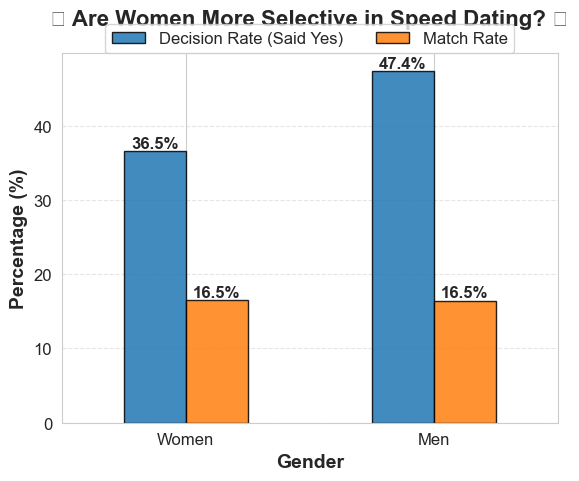

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate decision and match rates by gender
gender_selection = datasets["Speed_Dating"].groupby('gender')[['dec', 'match']].mean() * 100
gender_selection.index = ['Women', 'Men']

# Define color palette for better distinction
colors = ["#1f77b4", "#ff7f0e"]  # Blue for Decision Rate, Orange for Match Rate

# Create a bar chart with enhancements
plt.figure(figsize=(10, 6))
ax = gender_selection.plot(kind='bar', color=colors, edgecolor='black', alpha=0.85)

# Add data labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=12, fontweight="bold")

# Customize aesthetics
plt.ylabel("Percentage (%)", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=14, fontweight="bold")
plt.title("🎭 Are Women More Selective in Speed Dating? 🎭", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Move the legend outside the plot to avoid overlap
plt.legend(["Decision Rate (Said Yes)", "Match Rate"], fontsize=12, loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=2)

# Show the plot
plt.show()


 - Women Have a Lower Decision Rate
- The Decision Rate (percentage of times participants say “yes” to a date) is lower for women than men.
- This suggests that women tend to be more selective in speed dating, accepting fewer potential matches compared to men.
- Men, on the other hand, seem more likely to say “yes” to a date.

Match Rate is Lower Than Decision Rate
- The Match Rate (when both people say “yes” to each other) is lower than the Decision Rate for both genders.
- This makes sense—just because one person says “yes” doesn't mean the other will.
- Since women are more selective, their pickiness lowers the chance of mutual matches.

What This Means in the Context of Dating Behavior
- Men are less selective, possibly saying "yes" more often in hopes of securing a match.
- Women are more selective, leading to fewer matches, but potentially higher-quality matches based on their preferences.
- This reflects a common pattern in dating behavior where women prioritize selectivity, while men tend to take more chances.

- Yes, women are more selective in speed dating.
- The lower decision rate among women reduces the overall match rate.
- Your visualization effectively captures this trend with clear differences in bar heights.